<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Junwei He
- Nombre de alumno 2: Sofía Chávez Bastidas

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/sofiachavezb/LabProgramacionMDS)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?



1. Apache Spark es un motor unificado de analíticas para procesar datos a gran escala que intregra módulos para SQL, streaming, aprendizaje automático y procesamiento de grafos (Fuente Google Cloud). Una ventaja de Spark sobre Pandas es que puede manejar más datos y funciona mejor en datos no estructurados.
2. Es una estructura fudamental que permite el procesamiento distribuido de los datos. Dentro de sus principales caracteristicas se encuentran la inmutabilidad, es decir, no se pueden modificar una vez creado, estan distribuidos en particiones y son resilientes (las particiones se pueden regenerar si se pierden). Con respecto a los Data Frames, son la evolución de los RDD. Estos se construyen sobre RDDs, aprovechando su capacidad de procesamiento distribuido.
3. Las transformaciones son operaciones lazy que crean nuevos RDDs o DataSet a partir de uno existente. No ejecutan alguna operación pero construyen un plan de acción (map, filter, flatMap). Las acciones son operaciones que desencadenan la ejecución real del plan de transformaciones.( Collect, Count, Reduce). Internamente Spark optimiza el plan, luego divide el trabaja en etapas, envía las tareas al clúster y finalmente hace la ejecución en paralelo.
4. Las particiones son divisiones lógicas en conjuntos de datos en partes más pequeñas y manejables. Al hacer particiones, las operaciones se pueden hacer de manera más rápida y de forma paralela, generando tiempos de respuesta más bajos y un procesamiento más eficiente. También mejora la escalabilidad y flexibilidad, tiene mayor tolerancia a fallo.
5. Las funciones de spark driver son programar tareas, crear un plan de ejecución, controlar el ciclo de vida de la aplicación y recolectar resultados.
Las funciones de Spark Executor son ejecutar tareas, almacenar los datos en memoria y transforman los datos.

6. Es un optimizador de consultas integrado en Apache Spark y permite que Spark realice optimizaciones automáticas de las consultas SQL permitiendo mejora en el rendimiento de las aplicaciones.
La función principal es optimizar los planes de ejecución de las consultas SQL generando planes de ejecución optimizados de manera automática. Lo hace mediante la optimización de filtros y agregaciones, reordenación de joins y selección de estrategias físicas.



## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=ddc6b5ecb50e648f8542bf6049a4a052c95f3df054b7db594171537793127cc7
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [3]:
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

--2024-09-13 23:46:00--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79022616 (75M) [application/octet-stream]
Saving to: ‘datos_lab_spark.parquet’

datos_lab_spark.par 100%[===================>]  75.36M   135MB/s    in 0.6s    

2024-09-13 23:46:01 (135 MB/s) - ‘datos_lab_spark.parquet’ saved [79022616/79022616]



In [4]:
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

--2024-09-13 23:46:01--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 894 [application/octet-stream]
Saving to: ‘object.pkl’

object.pkl          100%[===================>]     894  --.-KB/s    in 0s      

2024-09-13 23:46:01 (262 MB/s) - ‘object.pkl’ saved [894/894]



In [5]:
# Escriba su respuesta aquí
sparksession = SparkSession.builder.master("local").appName("Lab4").getOrCreate()
df = (
    sparksession.read
    .option("header",'True')
    #.option('delimiter', ',') # Formato del delimiter en el archivo de lectura
    .parquet("datos_lab_spark.parquet")
)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [6]:
print('Schema')
df.printSchema()

Schema
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [7]:
print('First 10 rows')
df.show(n=10)

First 10 rows
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.19

In [8]:
print('5% sample')
df.sample(fraction=0.05, seed=42).show()

5% sample
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|  Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|                NULL|            254.48|2018-11-07 00:00:00| bank transfer|     electronics|    NULL|        NULL|  West Melissashire|    desktop|   

In [9]:
print('Columns data types')
df.dtypes

Columns data types


[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

* `Is An Alien` debería ser un `bool` en vez de `double`
* `Quantity`, `Customer Age`, `Account Age Days` y `Transaction Hour` podrían ser `int` en vez de `double`

In [10]:
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

In [11]:
from pyspark.sql.types import BooleanType, IntegerType
df = cast_columns(df, {'Is An Alien': BooleanType(),
                       'Quantity': IntegerType(),
                       'Customer Age':IntegerType(),
                       'Account Age Days':IntegerType(),
                       'Transaction Hour':IntegerType()
                       })

In [13]:
from pyspark.sql.functions import when, col, count
print('Null values per column')
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

Null values per column
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----

In [14]:
print('N rows without null values')
df= df.na.drop(how="any")
df.count()

N rows without null values


13388

In [15]:
print('N rows without duplicates')
df = df.distinct()
df.count()

N rows without duplicates


13388

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [16]:
from pyspark.sql.functions import col, log, abs, pow, month, avg
print('Convertir a Bodoque pesos')
df = df.withColumn(
    "Transaction bp",
    log(48 + abs(pow(col("Transaction Amount"), 36)))
)
df.show(5)

Convertir a Bodoque pesos
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|8441d125-c6b8-444...|8be8b3cb-1102-42f...|             73.19|2020-07-09 00:00:00|        PayPal|    toys &

In [17]:
print('Crear columna mes de transaccion')
df = df.withColumn("Transaction Month", month(col("Transaction Date")))
df.show(5)

Crear columna mes de transaccion
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|8441d125-c6b8-444...|8be8b3cb-1102-42f...|   

In [18]:
print('Crear columna con tipo de compra')
df = df.withColumn(
    "Type of purchase",
    when(col("Quantity") <= 4, "Compra minorista")
    .otherwise("Compra mayorista")
)
df.show(5)

Crear columna con tipo de compra
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+-------------

In [19]:
print('Compras alienigenas mayoristas')
df.filter((col("Is An Alien") == "true") & (col("Type of purchase") == "Compra mayorista")).show()

Compras alienigenas mayoristas
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+---------

In [20]:
print('nº de compras de aliens vs humanos')
df.groupBy("Is An Alien").count().show()

nº de compras de aliens vs humanos
+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|       true|  688|
|      false|12700|
+-----------+-----+



In [21]:
print('Recaudacion promedio por medio de pago para terricolas y alienigenas')
df.groupBy("Is An Alien", "Payment Method") \
  .agg(avg("Transaction bp").alias("Average Revenue")) \
  .groupBy("Is An Alien") \
  .pivot("Payment Method") \
  .avg("Average Revenue") \
  .show()


Recaudacion promedio por medio de pago para terricolas y alienigenas
+-----------+------------------+------------------+------------------+------------------+
|Is An Alien|            PayPal|     bank transfer|       credit card|        debit card|
+-----------+------------------+------------------+------------------+------------------+
|       true|196.85889780945232|  198.030849132072|200.05559416235346|198.31819802022594|
|      false|176.67179276590048|177.58172809926887|175.53663322496544| 177.3944926290297|
+-----------+------------------+------------------+------------------+------------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [22]:
import matplotlib.pyplot as plt

alien_color = 'palevioletred'
human_color = 'steelblue'

#### Variables categóricas

##### Preprocesamiento

In [23]:
from pyspark.sql.functions import count, sum

# N transactions by Payment Method
payment_method_df = df.groupBy("Payment Method", "Is An Alien") \
    .agg(count("Transaction ID").alias("Transaction Count"))

payment_method_pivot_df = payment_method_df.groupBy("Payment Method") \
    .pivot("Is An Alien") \
    .agg(sum("Transaction Count")) \
    .withColumnRenamed("true", "Alien") \
    .withColumnRenamed("false", "Human")

# N transactions by Device Used
device_used_df = df.groupBy("Device Used", "Is An Alien") \
    .agg(count("Transaction ID").alias("Transaction Count"))

device_used_pivot_df = device_used_df.groupBy("Device Used") \
    .pivot("Is An Alien") \
    .agg(sum("Transaction Count")) \
    .withColumnRenamed("true", "Alien") \
    .withColumnRenamed("false", "Human")

# N transactions by Product Category
product_category_df = df.groupBy("Product Category", "Is An Alien") \
    .agg(count("Transaction ID").alias("Transaction Count"))

product_category_pivot_df = product_category_df.groupBy("Product Category") \
    .pivot("Is An Alien") \
    .agg(sum("Transaction Count")) \
    .withColumnRenamed("true", "Alien") \
    .withColumnRenamed("false", "Human")

payment_method_pd = payment_method_pivot_df.toPandas()
device_used_pd = device_used_pivot_df.toPandas()
product_category_pd = product_category_pivot_df.toPandas()


##### Métodos de pago

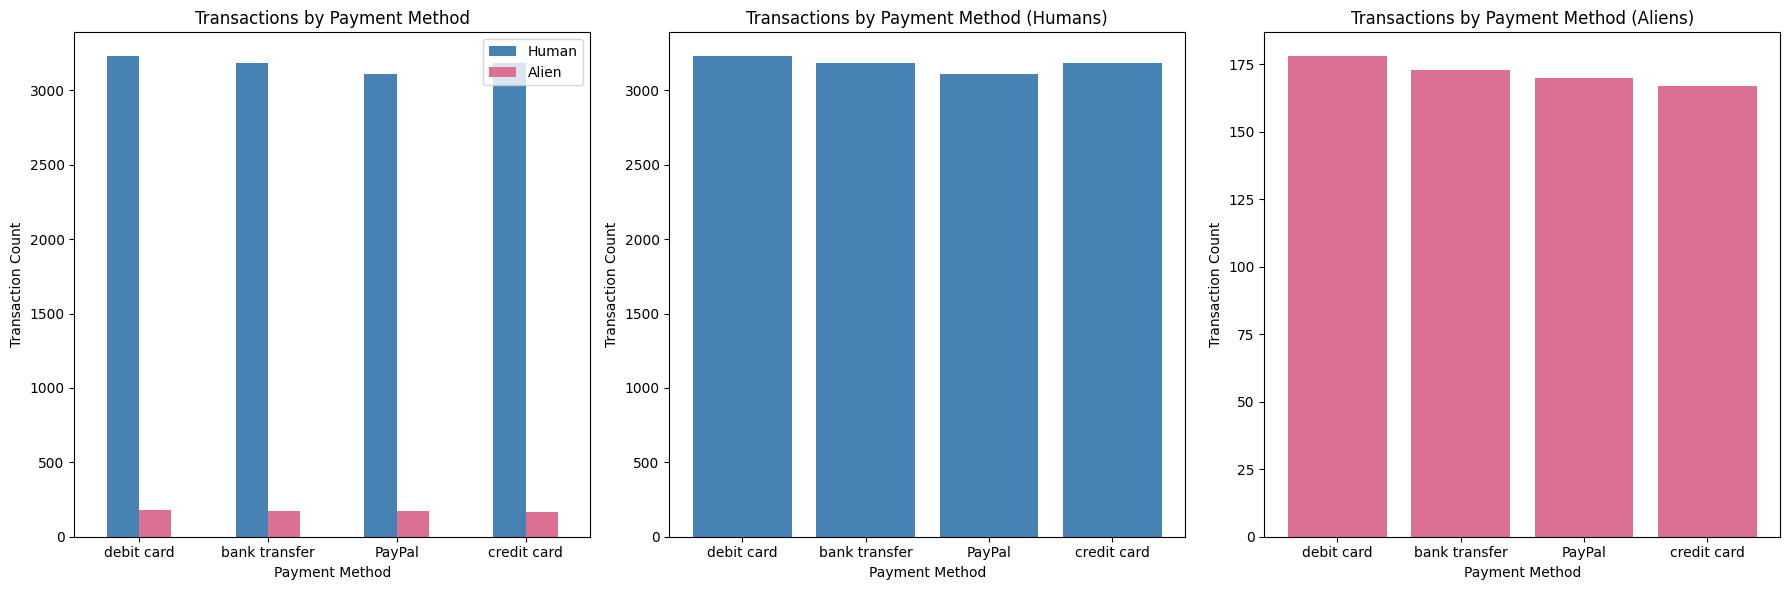

In [24]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
payment_method_pd.plot(kind='bar', x='Payment Method', y=['Human', 'Alien'], color=[human_color, alien_color], ax=plt.gca())
plt.title('Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
plt.bar(payment_method_pd['Payment Method'], payment_method_pd['Human'], color=human_color)
plt.title('Transactions by Payment Method (Humans)')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
plt.bar(payment_method_pd['Payment Method'], payment_method_pd['Alien'], color=alien_color)
plt.title('Transactions by Payment Method (Aliens)')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Se observa que hay muchas más transacciones realizadas por humanos, tanto ellos como los extraterrestres tienen un uso cuasi uniforme de los distintos medios de pago, sin notorias preferencias.

##### Dispositivo usado

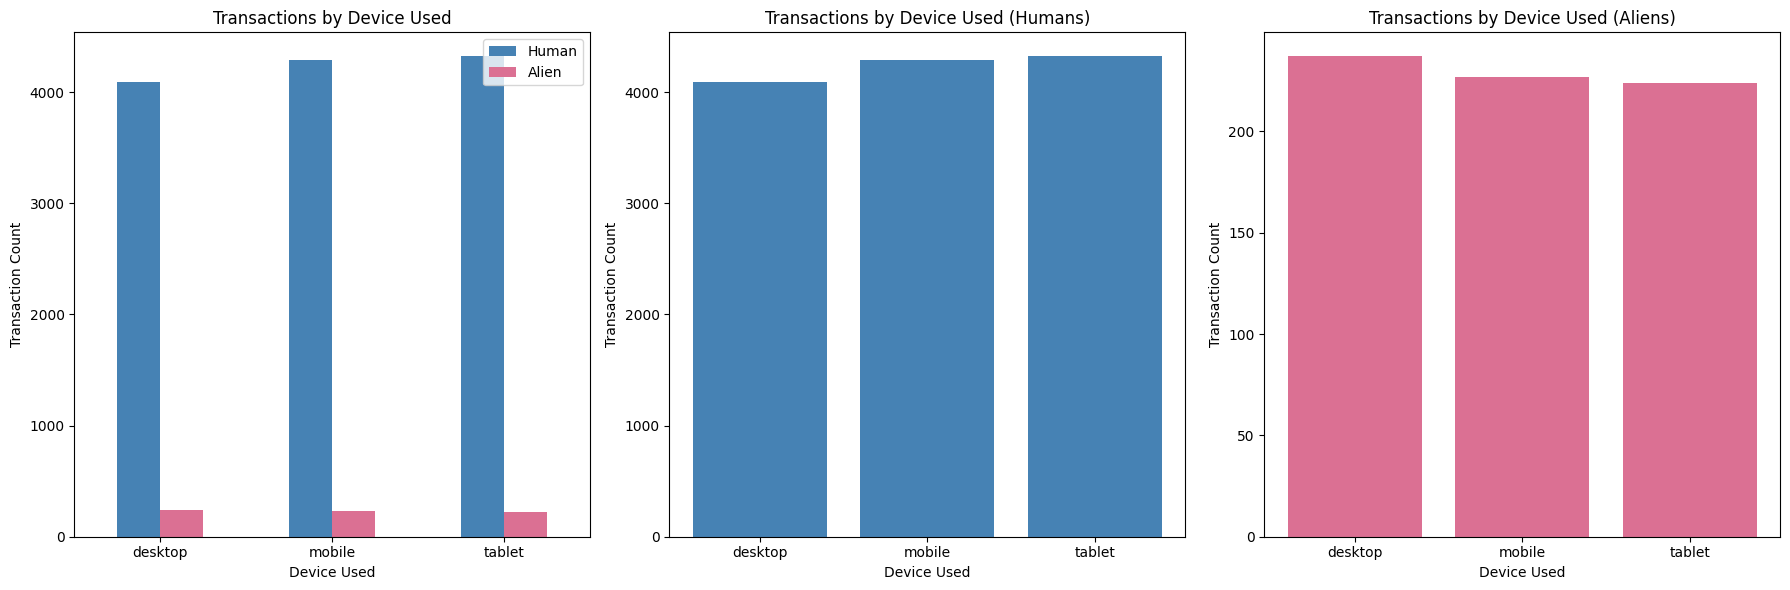

In [25]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
device_used_pd.plot(kind='bar', x='Device Used', y=['Human', 'Alien'], color=[human_color, alien_color], ax=plt.gca())
plt.title('Transactions by Device Used')
plt.xlabel('Device Used')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
plt.bar(device_used_pd['Device Used'], device_used_pd['Human'], color=human_color)
plt.title('Transactions by Device Used (Humans)')
plt.xlabel('Device Used')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
plt.bar(device_used_pd['Device Used'], device_used_pd['Alien'], color=alien_color)
plt.title('Transactions by Device Used (Aliens)')
plt.xlabel('Device Used')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Se observan leves diferencias en el uso de los dispositivos, siendo los más usados por los humanos las tablets, móviles y finalmente los de escritorio. Para los aliens el sentido es inverso. Sin embargo, en ningún grupo las diferencias son significativas.

##### Categoría de producto


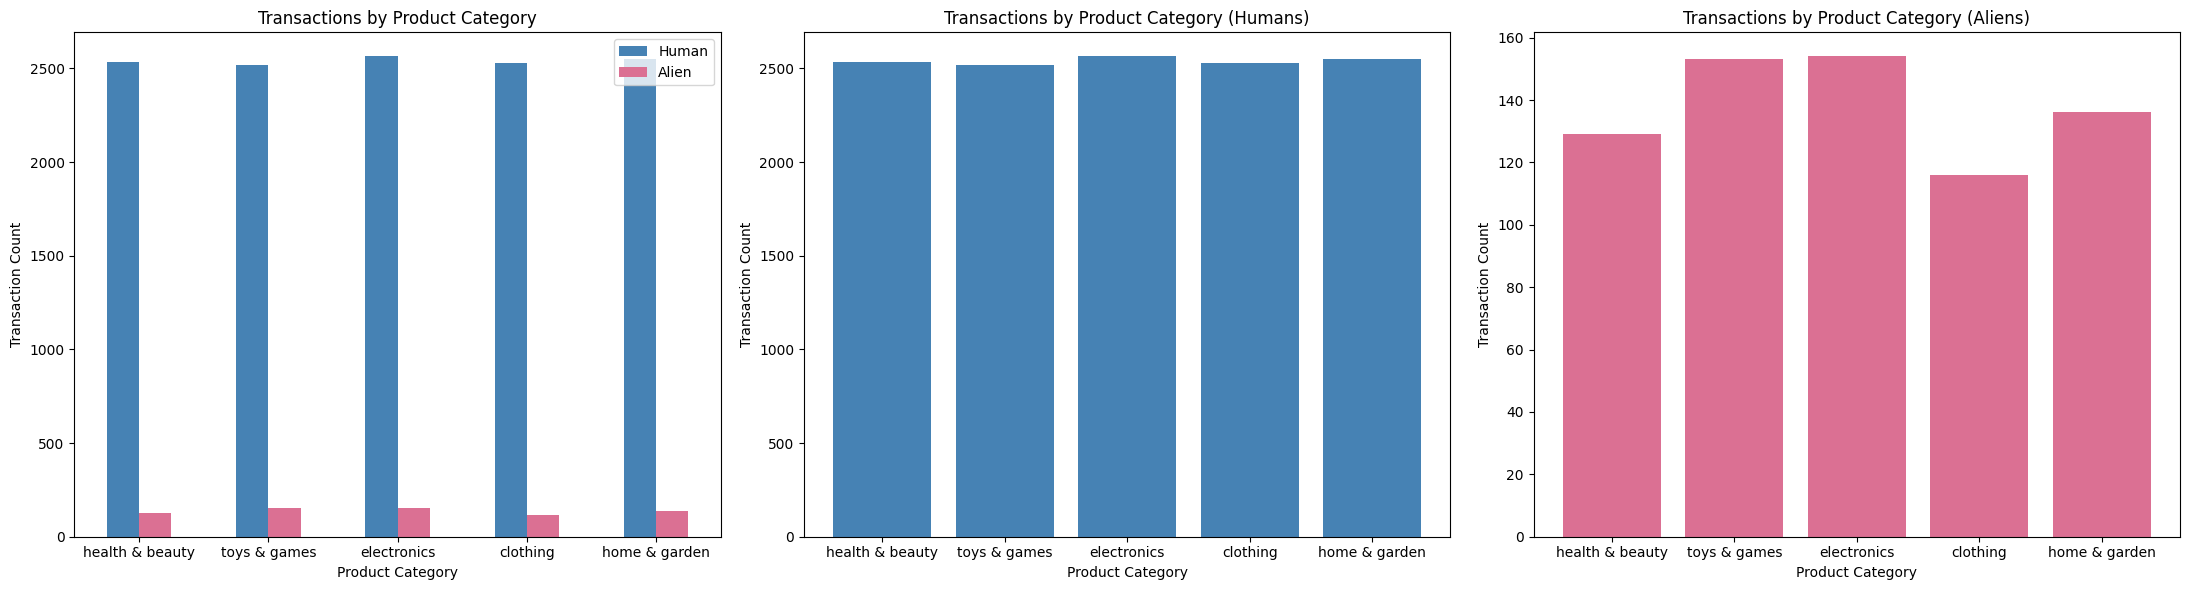

In [26]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1)
product_category_pd.plot(kind='bar', x='Product Category', y=['Human', 'Alien'], color=[human_color, alien_color], ax=plt.gca())
plt.title('Transactions by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
plt.bar(product_category_pd['Product Category'], product_category_pd['Human'], color=human_color)
plt.title('Transactions by Product Category (Humans)')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
plt.bar(product_category_pd['Product Category'], product_category_pd['Alien'], color=alien_color)
plt.title('Transactions by Product Category (Aliens)')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

En humanos no se encuentran preferencias relevantes entre las distintas categorías de productos. Sin embargo, en aliens se aprecia un mayor consumo de toys & Games con electronics, luego home & garden, health & beauty y finalmente clothing, con un uso notoriamente menor.

#### Variables numéricas

In [27]:
df_pandas = df.toPandas()
df_pandas['Is An Alien'] = df_pandas['Is An Alien'].astype('bool')

##### Edad de cliente

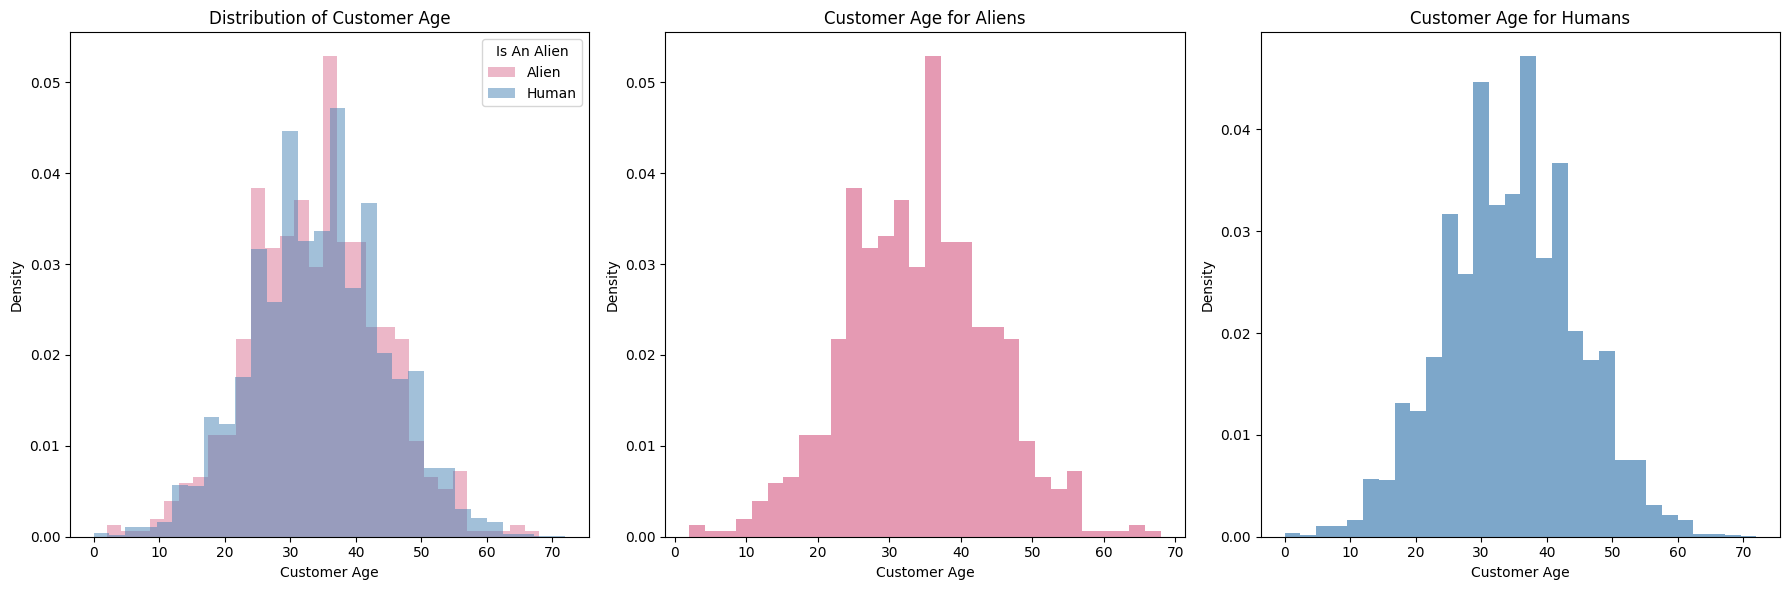

In [28]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(df_pandas[df_pandas['Is An Alien'] == True]['Customer Age'], bins=30, alpha=0.5, color=alien_color, label='Alien', density=True)
plt.hist(df_pandas[df_pandas['Is An Alien'] == False]['Customer Age'], bins=30, alpha=0.5, color=human_color, label='Human', density=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.legend(title='Is An Alien')

plt.subplot(1, 3, 2)
plt.hist(df_pandas[df_pandas['Is An Alien'] == True]['Customer Age'], bins=30, alpha=0.7, color=alien_color, density=True)
plt.title('Customer Age for Aliens')
plt.xlabel('Customer Age')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
plt.hist(df_pandas[df_pandas['Is An Alien'] == False]['Customer Age'], bins=30, alpha=0.7, color=human_color, density=True)
plt.title('Customer Age for Humans')
plt.xlabel('Customer Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Se observa una distribución similar en la edad de los clientes humanos y extraterrestres, similar a una normal centrada en 35.

##### Monto de transacción

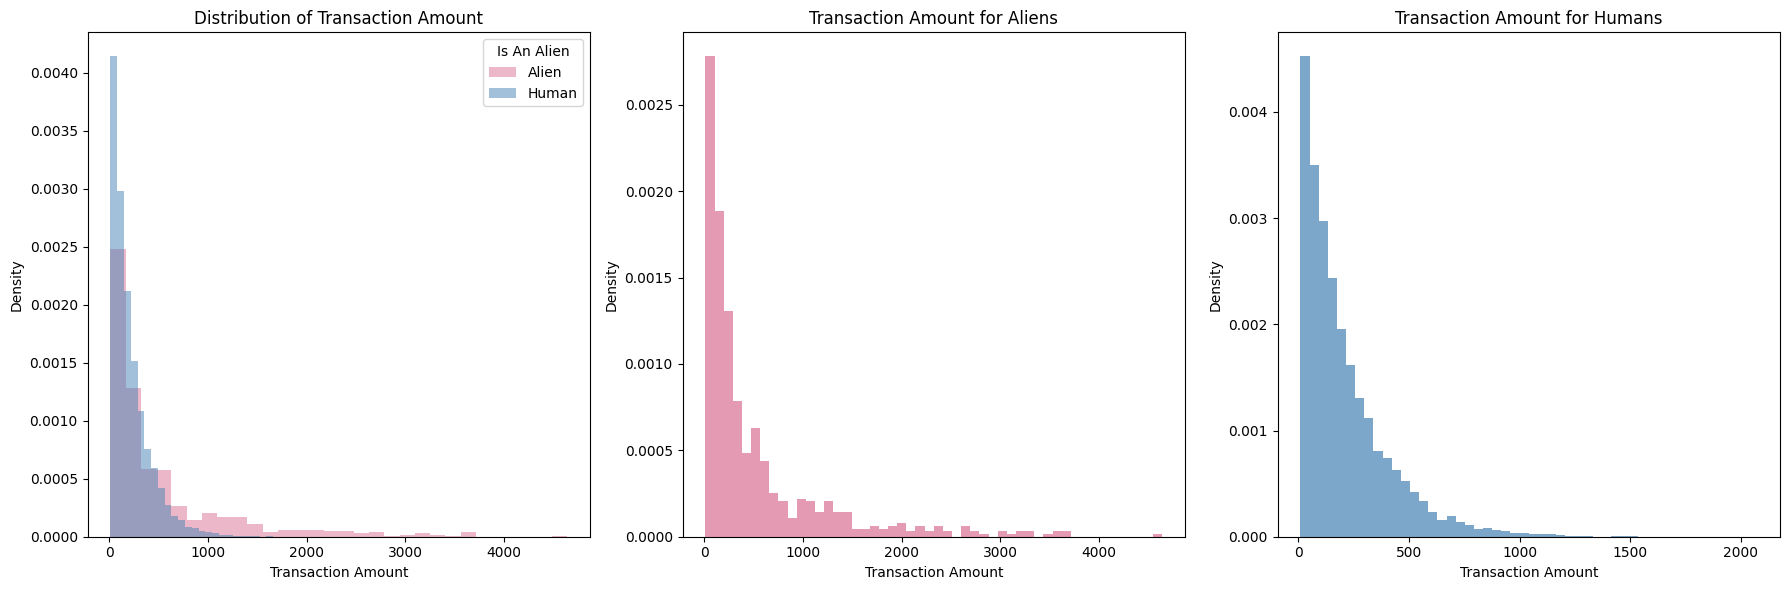

In [29]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(df_pandas[df_pandas['Is An Alien'] == True]['Transaction Amount'], bins=30, alpha=0.5, color=alien_color, label='Alien', density=True)
plt.hist(df_pandas[df_pandas['Is An Alien'] == False]['Transaction Amount'], bins=30, alpha=0.5, color=human_color, label='Human', density=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend(title='Is An Alien')

plt.subplot(1, 3, 2)
plt.hist(df_pandas[df_pandas['Is An Alien'] == True]['Transaction Amount'], bins=50, alpha=0.7, color=alien_color, density=True)
plt.title('Transaction Amount for Aliens')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
# Transaction Amount for Humans
plt.subplot(1, 3, 3)
plt.hist(df_pandas[df_pandas['Is An Alien'] == False]['Transaction Amount'], bins=50, alpha=0.7, color=human_color, density=True)
plt.title('Transaction Amount for Humans')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Tanto humanos como alienígenas presentan un consumo que decae rápidamente a medida que el precio aumenta, con una distribución con forma similar a una 1/x. Sin embargo, los alienígenas decaen un poco más rápido antes alcanzar los montos de 500, para luego decaer más lento que los humanos y tener consumos de montos que los humanos no alcanzan.

##### Monto de transacción en BP

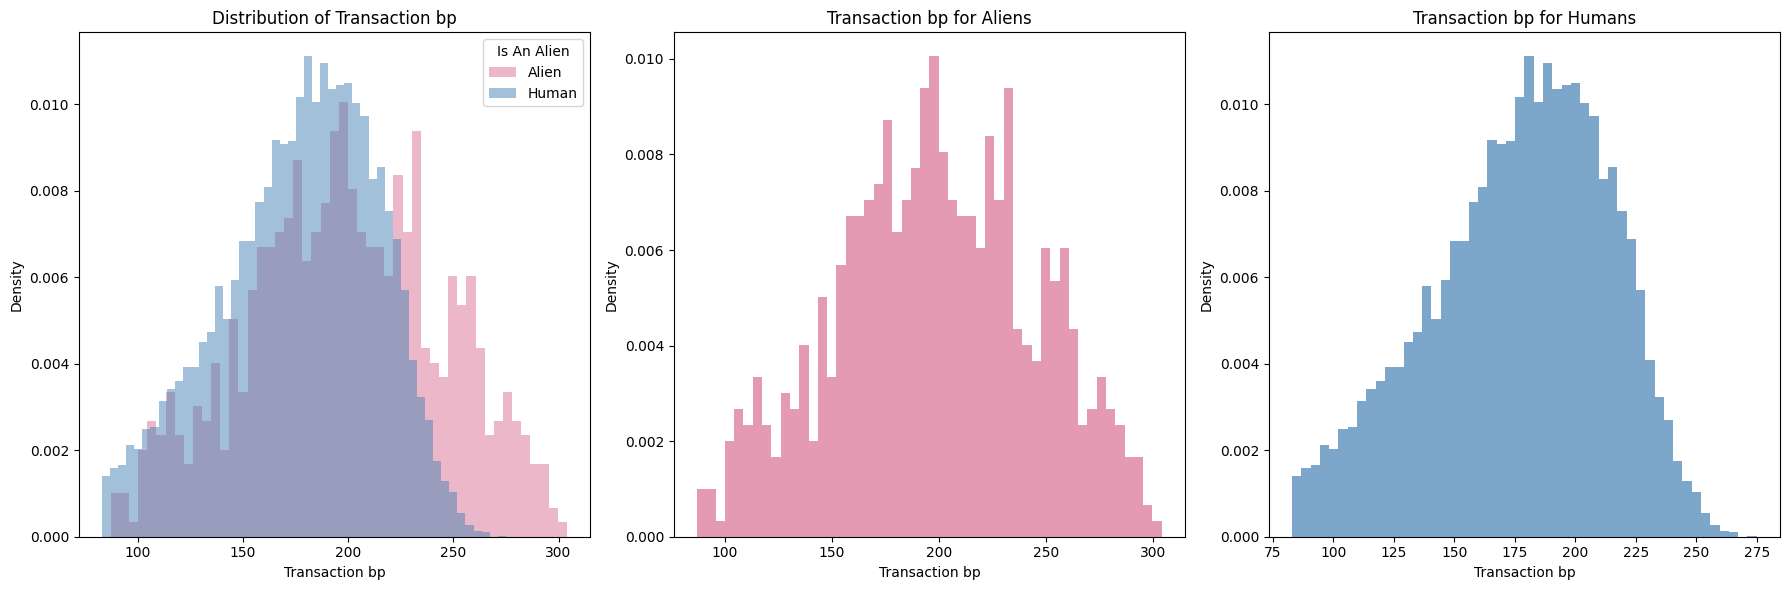

In [30]:
plt.figure(figsize=(18, 6))

# Original Distribution of Transaction bp
plt.subplot(1, 3, 1)
plt.hist(df_pandas[df_pandas['Is An Alien'] == True]['Transaction bp'], bins=50, alpha=0.5, color=alien_color, label='Alien', density=True)
plt.hist(df_pandas[df_pandas['Is An Alien'] == False]['Transaction bp'], bins=50, alpha=0.5, color=human_color, label='Human', density=True)
plt.title('Distribution of Transaction bp')
plt.xlabel('Transaction bp')
plt.ylabel('Density')
plt.legend(title='Is An Alien')

# Transaction bp for Aliens
plt.subplot(1, 3, 2)
plt.hist(df_pandas[df_pandas['Is An Alien'] == True]['Transaction bp'], bins=50, alpha=0.7, color=alien_color, density=True)
plt.title('Transaction bp for Aliens')
plt.xlabel('Transaction bp')
plt.ylabel('Density')

# Transaction bp for Humans
plt.subplot(1, 3, 3)
plt.hist(df_pandas[df_pandas['Is An Alien'] == False]['Transaction bp'], bins=50, alpha=0.7, color=human_color, density=True)
plt.title('Transaction bp for Humans')
plt.xlabel('Transaction bp')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Se observa que la transformación a BP afectó fuertemente a las distribuciones de los montos. Mientras que los aliens presentan una distribución simétrica en torno a 200 BP aprox, los humanos tienen una distribución skewed hacia la izquierda. Además, los extraterrestres alcanzan mayores valores.

#### Transacciones

##### Preprocesamiento

In [31]:
from pyspark.sql.functions import year

df = df.withColumn("Transaction Year", year(df["Transaction Date"]))

total_transactions_df = df.groupBy("Transaction Year", "Is An Alien") \
    .agg(count("Transaction ID").alias("Total Transactions")) \
    .orderBy(["Transaction Year", "Is An Alien"])
#total_transactions_df.show()

minor_transactions_df = df.filter(col("Type of purchase") == "Compra minorista") \
    .groupBy("Transaction Year", "Is An Alien") \
    .agg(count("Transaction ID").alias("Minor Transactions"))\
    .orderBy(["Transaction Year", "Is An Alien"])

#minor_transactions_df.show()

# Percentage of minor transactions
percentages_df = total_transactions_df.join(minor_transactions_df,
                                             ["Transaction Year", "Is An Alien"],
                                             "inner")

percentages_df = percentages_df.withColumn(
    "Minor Percentage",
    (col("Minor Transactions") / col("Total Transactions"))
)

#percentages_df.show()

percentages_pivot_df = percentages_df.groupBy("Transaction Year") \
    .pivot("Is An Alien") \
    .agg(
        sum("Minor Percentage").alias("Minor Percentage")
    )
percentages_pivot_df = percentages_pivot_df.withColumnRenamed("false", "Human Minor Transaction Percentage") \
                                           .withColumnRenamed("true", "Alien Minor Transaction Percentage")

percentages_pivot_df.show()

+----------------+----------------------------------+----------------------------------+
|Transaction Year|Human Minor Transaction Percentage|Alien Minor Transaction Percentage|
+----------------+----------------------------------+----------------------------------+
|            2018|                0.7841218053289831|                0.8053097345132744|
|            2023|                0.7880285557386052|                0.7596153846153846|
|            2022|                0.8111888111888111|                0.8105263157894737|
|            2019|                0.7995444191343963|                0.8144329896907216|
|            2020|                0.7806345733041575|                0.8235294117647058|
|            2024|                0.7919463087248322|                               0.8|
|            2021|                0.8197899391929243|                0.8173076923076923|
+----------------+----------------------------------+----------------------------------+



In [32]:
yearly_revenue = df.groupBy("Is An Alien", "Transaction Year") \
  .agg(
      sum("Transaction bp").alias("Total Revenue"),
      avg("Transaction bp").alias("Average Revenue")
  )
yearly_revenue = yearly_revenue.groupBy("Transaction Year") \
  .pivot("Is An Alien") \
  .agg(
      sum("Total Revenue").alias("Total Revenue"),
      avg("Average Revenue").alias("Average Revenue")
  )

yearly_revenue = yearly_revenue.withColumnRenamed("false_Total Revenue", "Human Total Revenue") \
                     .withColumnRenamed("true_Total Revenue", "Alien Total Revenue") \
                     .withColumnRenamed("false_Average Revenue", "Human Average Revenue") \
                     .withColumnRenamed("true_Average Revenue", "Alien Average Revenue")

yearly_revenue = yearly_revenue.orderBy("Transaction Year")

yearly_df = yearly_revenue.join(percentages_pivot_df, "Transaction Year", "left").orderBy("Transaction Year")

yearly_pd = yearly_df.toPandas()

yearly_df.show()

+----------------+-------------------+---------------------+-------------------+---------------------+----------------------------------+----------------------------------+
|Transaction Year|Human Total Revenue|Human Average Revenue|Alien Total Revenue|Alien Average Revenue|Human Minor Transaction Percentage|Alien Minor Transaction Percentage|
+----------------+-------------------+---------------------+-------------------+---------------------+----------------------------------+----------------------------------+
|            2018| 324569.46344567335|    176.4923672896538|  22315.71474305336|   197.48420126595892|                0.7841218053289831|                0.8053097345132744|
|            2019|  311282.2181617678|   177.26777799645092| 19906.218922823573|    205.2187517816863|                0.7995444191343963|                0.8144329896907216|
|            2020| 323062.26969219494|   176.72990683380468|  17071.98976042995|   200.84693835799942|                0.780634573304157

##### Ingresos anuales

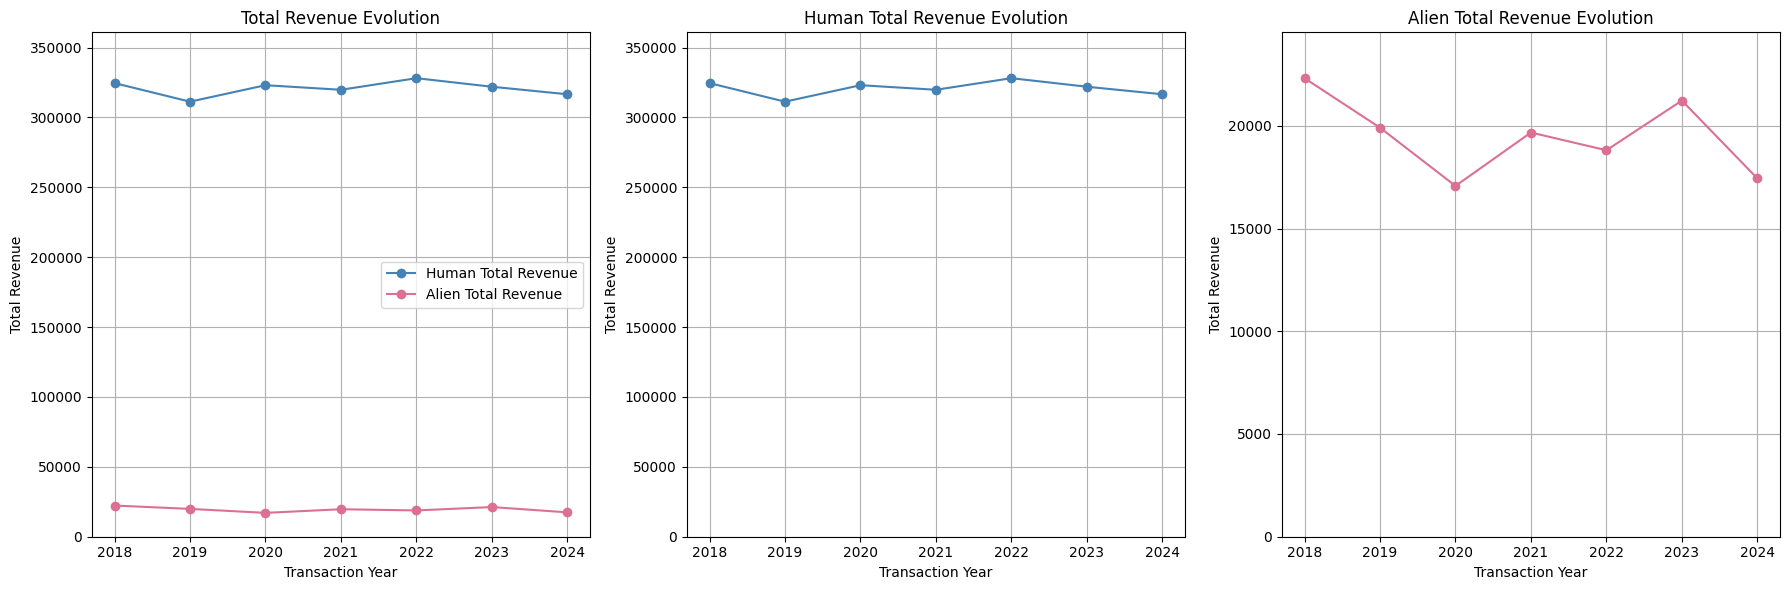

In [33]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Human Total Revenue'], marker='o', color=human_color, label='Human Total Revenue')
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Alien Total Revenue'], marker='o', color=alien_color, label='Alien Total Revenue')
plt.title('Total Revenue Evolution')
plt.xlabel('Transaction Year')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.ylim(0, max(yearly_pd['Human Total Revenue'].max(), yearly_pd['Alien Total Revenue'].max()) * 1.1)  # Extend y-axis to ensure visibility

plt.subplot(1, 3, 2)
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Human Total Revenue'], marker='o', color=human_color)
plt.title('Human Total Revenue Evolution')
plt.xlabel('Transaction Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.ylim(0, yearly_pd['Human Total Revenue'].max() * 1.1)

plt.subplot(1, 3, 3)
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Alien Total Revenue'], marker='o', color=alien_color)
plt.title('Alien Total Revenue Evolution')
plt.xlabel('Transaction Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.ylim(0, yearly_pd['Alien Total Revenue'].max() * 1.1)

plt.tight_layout()
plt.show()


Se observa que los ingresos anuales generados por humanos son mucho mayores, además son más constantes (en proporción) que los generados por extraterrestres. Si bien las variaciones en los ingresos por alienígenas son más notorias que las de los humanos, resultan poco significativas respecto a los ingresos totales, puesto que los humanos ingresan más de 10 veces el total de los aliens.

##### Ingresos promedio

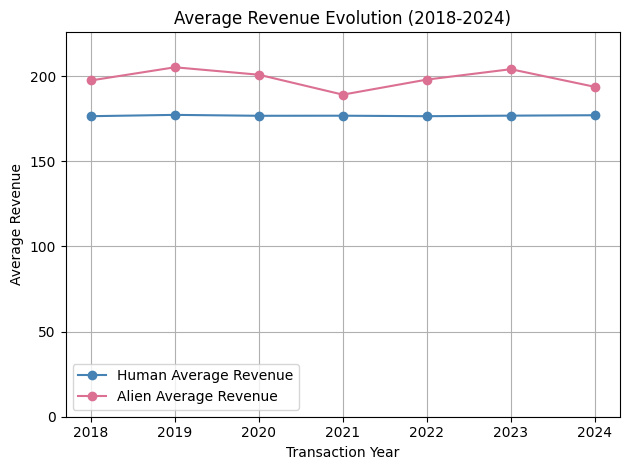

In [34]:
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Human Average Revenue'], marker='o', color=human_color, label='Human Average Revenue')
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Alien Average Revenue'], marker='o', color=alien_color, label='Alien Average Revenue')

plt.title('Average Revenue Evolution (2018-2024)')
plt.xlabel('Transaction Year')
plt.ylabel('Average Revenue')
plt.legend()
plt.grid(True)

plt.ylim(0, max(yearly_pd['Alien Average Revenue'].max(),
                yearly_pd['Human Average Revenue'].max()) * 1.1)
plt.tight_layout()
plt.show()


Se observa que los ingresos promedio por transacción se mantinen constantes en humanos. En alienígenas hay una pequeña decaída en 2021, sin embargo no sobrepasa el 10%.

##### Porcentaje de compras minoristas

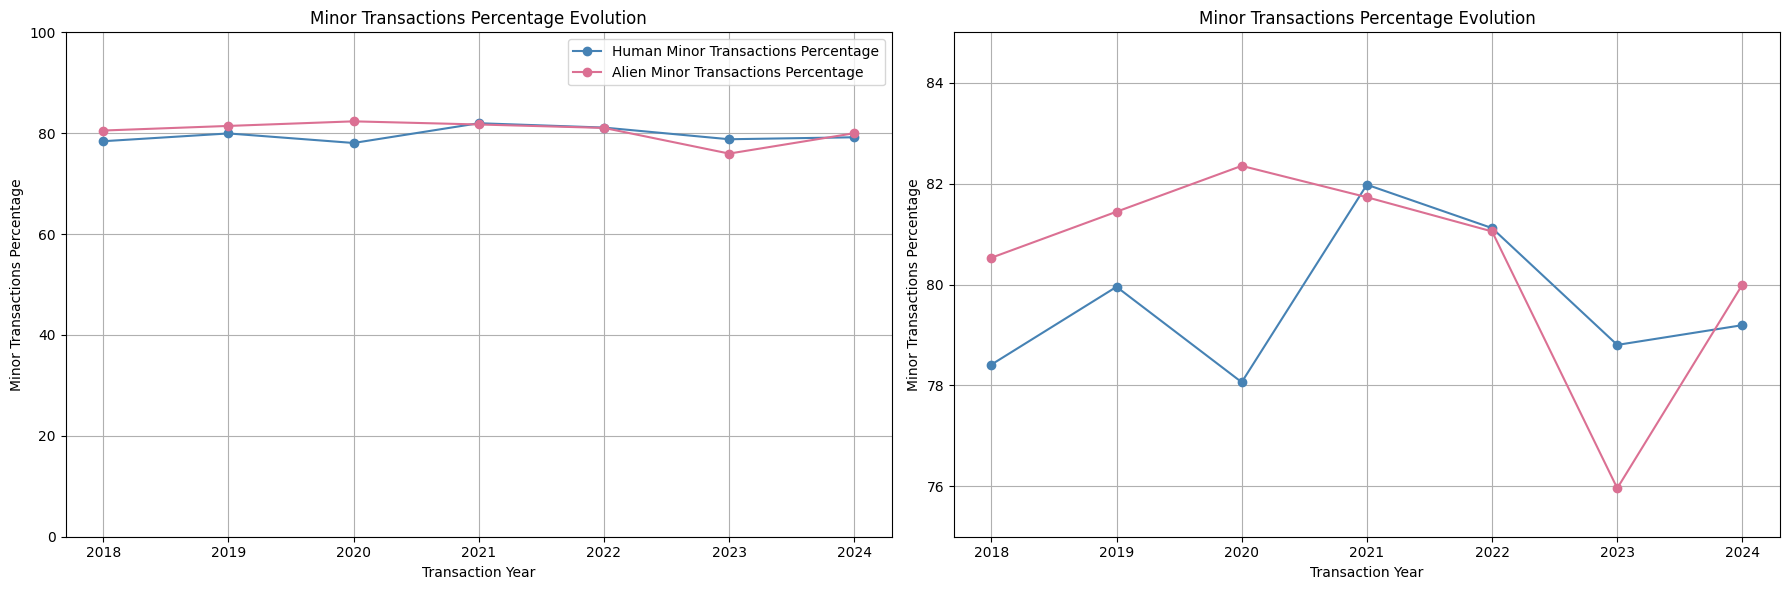

In [35]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Human Minor Transaction Percentage'] * 100, marker='o', color=human_color, label='Human Minor Transactions Percentage')
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Alien Minor Transaction Percentage'] * 100, marker='o', color=alien_color, label='Alien Minor Transactions Percentage')
plt.title('Minor Transactions Percentage Evolution')
plt.xlabel('Transaction Year')
plt.ylabel('Minor Transactions Percentage')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Human Minor Transaction Percentage'] * 100, marker='o', color=human_color)
plt.plot(yearly_pd['Transaction Year'], yearly_pd['Alien Minor Transaction Percentage'] * 100, marker='o', color=alien_color)
plt.title('Minor Transactions Percentage Evolution')
plt.xlabel('Transaction Year')
plt.ylabel('Minor Transactions Percentage')
plt.grid(True)
plt.ylim(75, 85)

plt.tight_layout()
plt.show()


Se observan variaciones en el porcentage de compras minoristas poco significativas en el largo plazo, sin embargo, hay una caída de alrededor de un 5% de compras minoristas hechas por aliens en 2023 y un aumento de aproximadamente un 4% en las hechas por humanos en 2021.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [36]:
from pyspark.sql import SparkSession

# Iniciar una sesión de Spark
spark = SparkSession.builder \
    .appName("Principales Clientes") \
    .getOrCreate()

In [37]:
df_spark = sparksession.createDataFrame(df_pandas)

In [38]:
(
    df_spark.write.partitionBy("Customer Location")
    .format("parquet")
    .save("./parquets/example1/")
)

In [39]:
df_load = sparksession.read.parquet("./parquets/example1/")
df_renamed = df_load.withColumnRenamed("Customer ID", "Customer_ID")


In [40]:
df_renamed.createOrReplaceTempView("example_table1")

In [41]:
sparksession.sql("""
    SELECT Customer_ID, SUM(Quantity) AS Total_Products
    FROM example_table1
    GROUP BY Customer_ID
    ORDER BY Total_Products DESC
    LIMIT 10
""").show()



+--------------------+--------------+
|         Customer_ID|Total_Products|
+--------------------+--------------+
|c13c1196-f723-42f...|             5|
|92da1bf6-ed45-446...|             5|
|42abf5ec-345a-475...|             5|
|3479ddf1-6198-466...|             5|
|bc186cf6-6519-4d3...|             5|
|cb4b3340-09cd-4f2...|             5|
|4e66a48f-ecba-473...|             5|
|30d61062-b1ed-4ee...|             5|
|0f75d610-1c18-4e4...|             5|
|7058e1ba-b839-42c...|             5|
+--------------------+--------------+



### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [42]:
import pickle

with open('object.pkl', 'rb') as file:
    serialized_object = pickle.load(file)

print(type(serialized_object))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Notamos que el objeto es un modelo de regresión logística

In [43]:
print(dir(serialized_object))

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

In [44]:
help(serialized_object)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

El objeto cuenta con el método `predict`

In [45]:
print(dir(serialized_object))


['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

In [46]:
help(serialized_object.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._logistic.LogisticRegression instance
    Predict class labels for samples in X.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data matrix for which we want to get the predictions.
    
    Returns
    -------
    y_pred : ndarray of shape (n_samples,)
        Vector containing the class labels for each sample.



In [47]:
print(serialized_object.feature_names_in_)
print(serialized_object.n_features_in_)

['Transaction Amount' 'Quantity' 'Customer Age' 'Transaction Hour']
4


In [48]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def predict_fraud_probability(amount, quantity, age, hour)->float:
    model_prediction = serialized_object.predict([[amount, quantity, age, hour]])
    return float(model_prediction[-1])

udf_predict_fraud = udf(predict_fraud_probability, FloatType())

In [49]:
df_with_predictions = df.withColumn('Prediction', udf_predict_fraud(
    df['Transaction Amount'],
    df['Quantity'],
    df['Customer Age'],
    df['Transaction Hour']
))

df_with_predictions[df_with_predictions['Prediction']>0.0].sample(fraction=.01).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+----------------+----------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|Transaction Year|Prediction|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+----------------+----------+
+--------------+-----------+------------------+--